<a href="https://colab.research.google.com/github/romanescobar/alura-store-desafio/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = {
    'tienda 1': tienda1,
    'tienda 2': tienda2,
    'tienda 3': tienda3,
    'tienda 4': tienda4
}
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



--- Cálculo de Facturación Total por Tienda ---
Facturación total de tienda 1: $1,150,880,400.00
Facturación total de tienda 2: $1,116,343,500.00
Facturación total de tienda 3: $1,098,019,600.00
Facturación total de tienda 4: $1,038,375,700.00


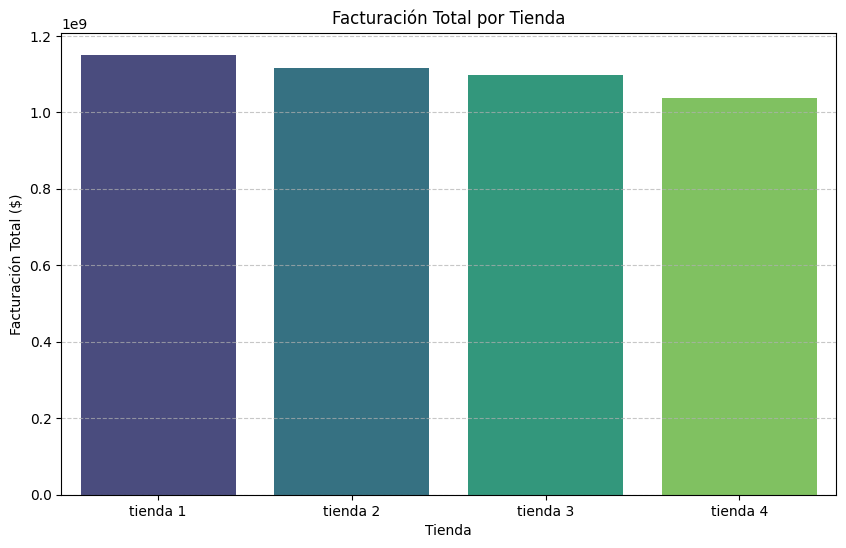


La tienda con la menor facturación total es: **tienda 4** con $1,038,375,700.00


In [26]:
print("--- Cálculo de Facturación Total por Tienda ---")

# Diccionario para almacenar la facturación total de cada tienda
facturacion_total = {}

for nombre_tienda, df in tiendas.items():

    # La facturación total es simplemente la suma de la columna 'Precio'
    total_ventas_tienda = df['Precio'].sum()

    # Almacenar el resultado en el diccionario
    facturacion_total[nombre_tienda] = total_ventas_tienda

    print(f"Facturación total de {nombre_tienda}: ${total_ventas_tienda:,.2f}")

# Convertir el diccionario de resultados en un DataFrame para mejor visualización
df_facturacion = pd.DataFrame.from_dict(facturacion_total, orient='index', columns=['Facturación Total'])
df_facturacion = df_facturacion.sort_values(by='Facturación Total', ascending=False)


# Crear un gráfico para visualizar la facturación total
plt.figure(figsize=(10, 6))
sns.barplot(x=df_facturacion.index, y='Facturación Total', data=df_facturacion, palette='viridis', hue=df_facturacion.index, legend=False)
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"\nLa tienda con la menor facturación total es: **{df_facturacion.index[-1]}** con ${df_facturacion['Facturación Total'].min():,.2f}")

# 2. Ventas por categoría


--- Análisis de Categorías Más Populares (por Conteo de Transacciones) ---

--- Categorías en tienda 1 (ordenadas por número de transacciones) ---
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


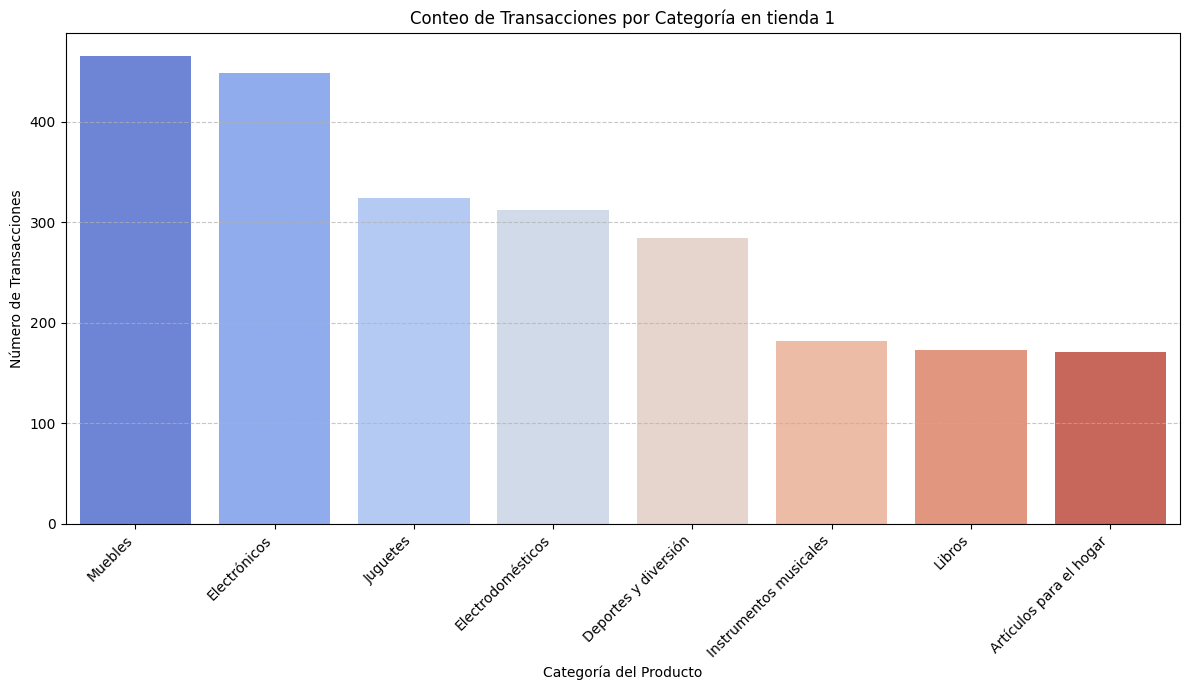


--- Categorías en tienda 2 (ordenadas por número de transacciones) ---
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


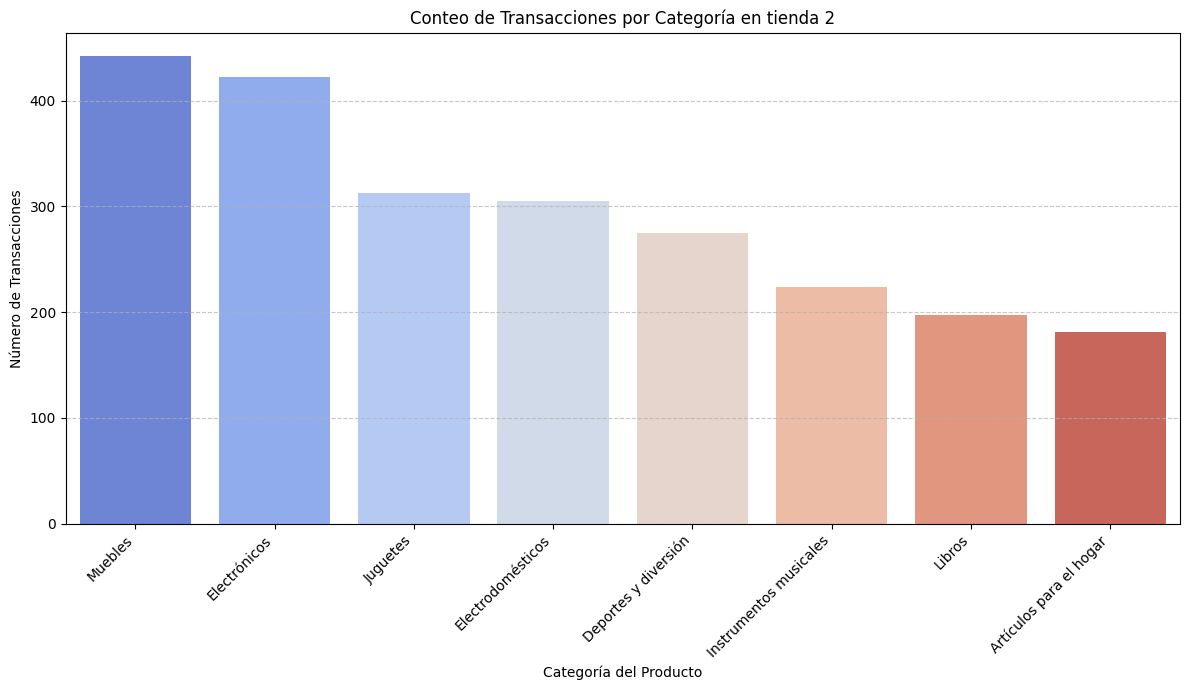


--- Categorías en tienda 3 (ordenadas por número de transacciones) ---
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64


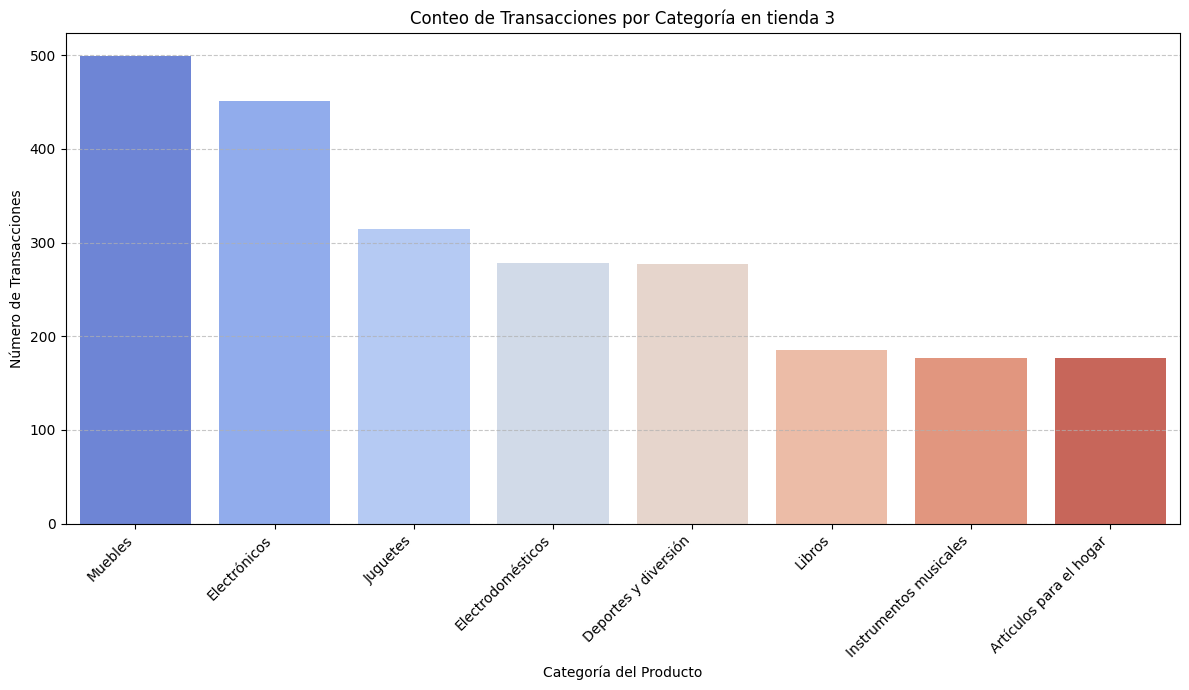


--- Categorías en tienda 4 (ordenadas por número de transacciones) ---
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64


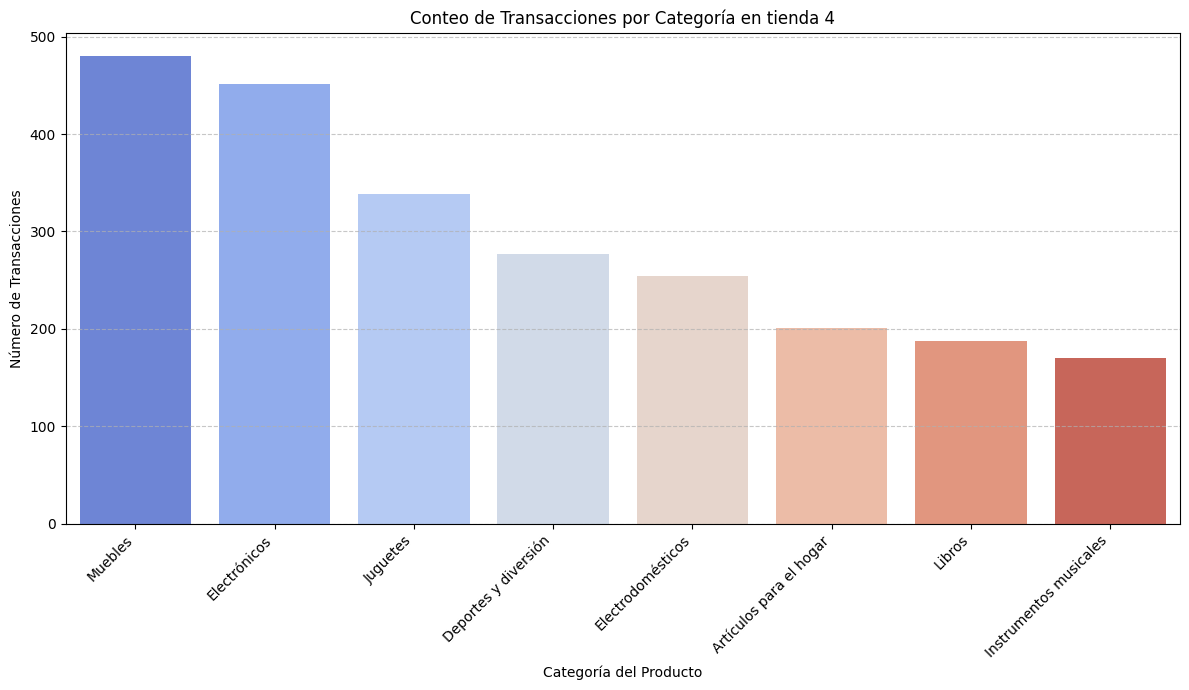

In [27]:

print("\n--- Análisis de Categorías Más Populares (por Conteo de Transacciones) ---")

# Iterar sobre cada tienda para analizar sus categorías
for nombre_tienda, df in tiendas.items():
    print(f"\n--- Categorías en {nombre_tienda} (ordenadas por número de transacciones) ---")

    # Agrupar por 'Categoría del Producto' y contar el número de ocurrencias (transacciones)
    # cada fila es una transacción/venta de un producto
    conteo_por_categoria = df['Categoría del Producto'].value_counts()

    # Mostrar categorías más populares
    print(conteo_por_categoria)
    # Crear un gráfico de barras para visualizar el conteo de transacciones por categoría
    plt.figure(figsize=(12, 7))
    sns.barplot(x=conteo_por_categoria.index, y=conteo_por_categoria.values, palette='coolwarm', hue=conteo_por_categoria.index, legend=False)
    plt.title(f'Conteo de Transacciones por Categoría en {nombre_tienda}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Número de Transacciones')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajusta el diseño para que las etiquetas no se corten
    plt.show()

# 3. Calificación promedio de la tienda



--- Análisis del Promedio de Calificación de Clientes ---
Promedio de calificación de clientes en tienda 1: 3.98
Promedio de calificación de clientes en tienda 2: 4.04
Promedio de calificación de clientes en tienda 3: 4.05
Promedio de calificación de clientes en tienda 4: 4.00


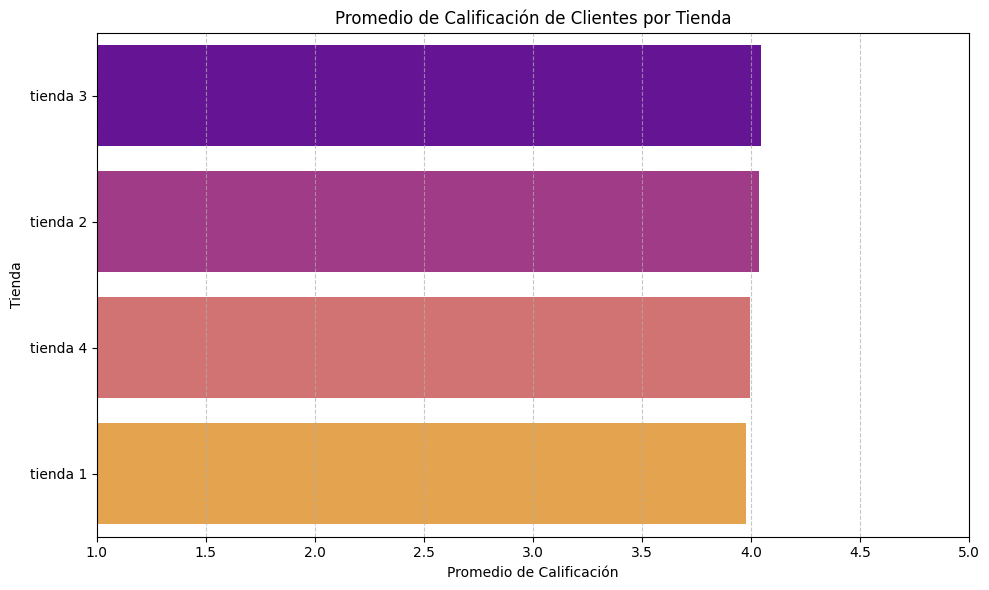


La tienda con el promedio de calificación más bajo es: **tienda 1** con un promedio de 3.98


In [28]:


print("\n--- Análisis del Promedio de Calificación de Clientes ---")

evaluacion_promedio = {}
for nombre_tienda, df in tiendas.items():
    promedio_evaluacion = df['Calificación'].mean()
    evaluacion_promedio[nombre_tienda] = promedio_evaluacion
    print(f"Promedio de calificación de clientes en {nombre_tienda}: {promedio_evaluacion:.2f}")

df_evaluacion = pd.DataFrame.from_dict(evaluacion_promedio, orient='index', columns=['Promedio Calificación'])
df_evaluacion = df_evaluacion.sort_values(by='Promedio Calificación', ascending=False) # Ordenar de mayor a menor para que la barra más alta quede arriba


# --- Nuevo Gráfico: Barras Horizontales ---
plt.figure(figsize=(10, 6))
# Para barras horizontales, 'y' es la categoría y 'x' es el valor
sns.barplot(x='Promedio Calificación', y=df_evaluacion.index, data=df_evaluacion, palette='plasma', hue=df_evaluacion.index, legend=False, orient='h')

plt.title('Promedio de Calificación de Clientes por Tienda')
plt.xlabel('Promedio de Calificación')
plt.ylabel('Tienda')
plt.xlim(1, 5) # Establecer los límites del eje X de 1 a 5 (escala de calificación común)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Cuadrícula en el eje X
plt.tight_layout() # Ajusta el diseño para que todo quepa
plt.show()



print(f"\nLa tienda con el promedio de calificación más bajo es: **{df_evaluacion.index[-1]}** con un promedio de {df_evaluacion['Promedio Calificación'].min():.2f}")

# 4. Productos más y menos vendidos


--- Análisis de Productos Más y Menos Vendidos  ---

--- Análisis de Productos para tienda 1 ---

Los Top 5 Productos Más Vendidos por conteo de transacciones:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64


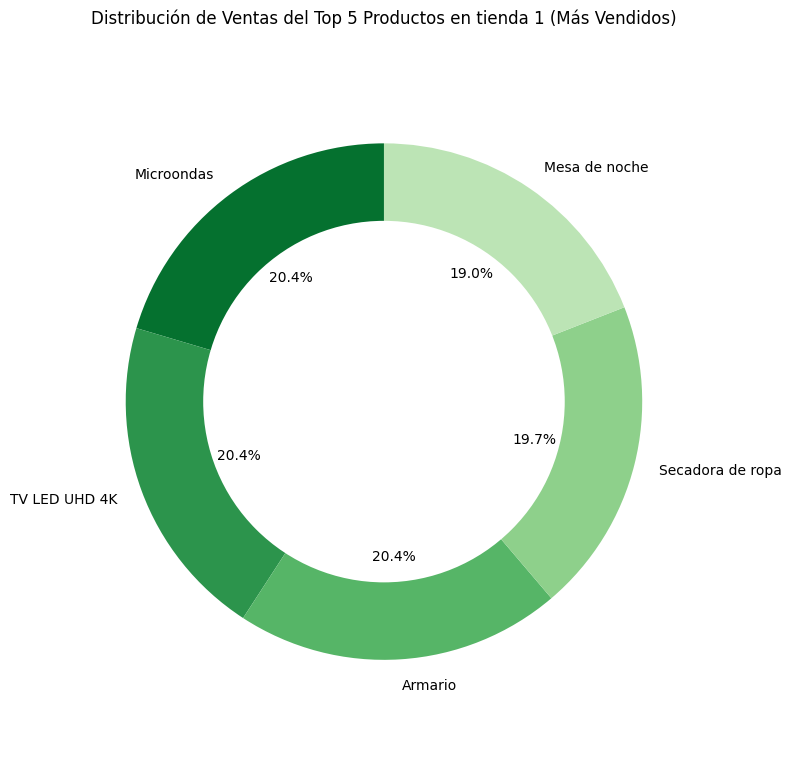


Los Top 5 Productos Menos Vendidos por conteo de transacciones:
Producto
Auriculares con micrófono    33
Celular ABXY                 33
Olla de presión              35
Pandereta                    36
Mochila                      39
Name: count, dtype: int64


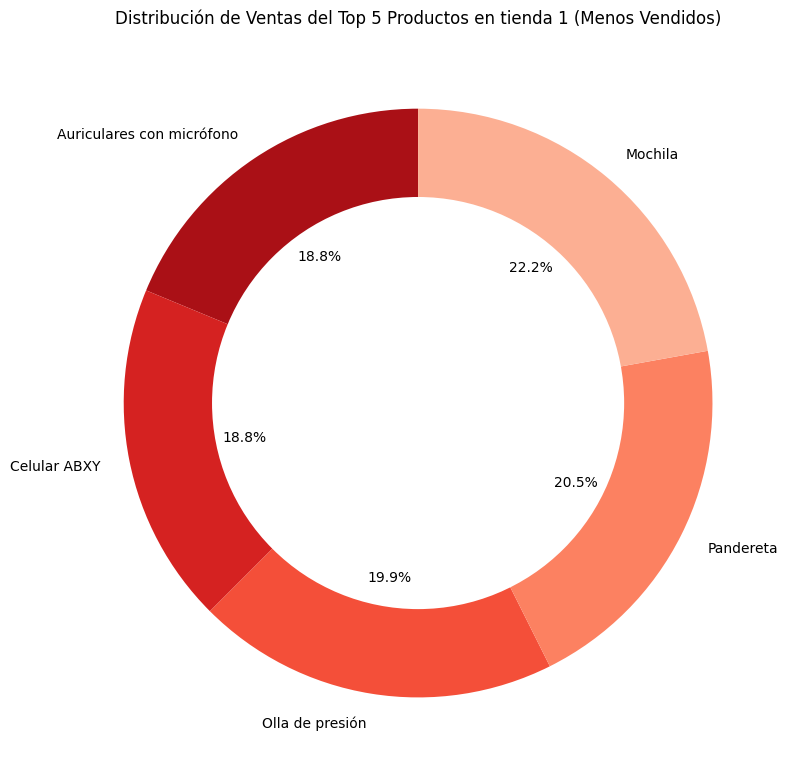


--- Análisis de Productos para tienda 2 ---

Los Top 5 Productos Más Vendidos por conteo de transacciones:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64


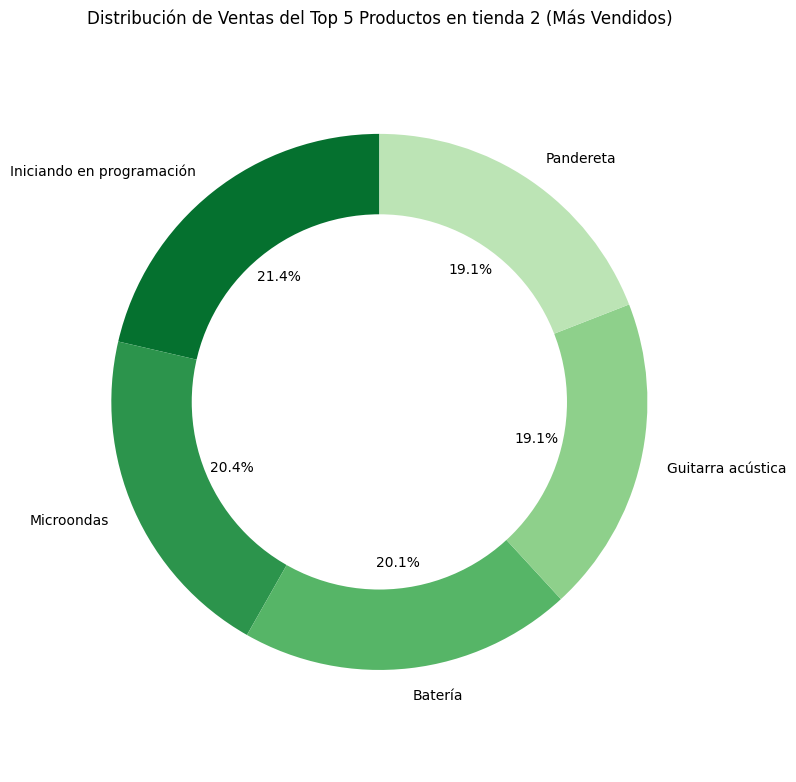


Los Top 5 Productos Menos Vendidos por conteo de transacciones:
Producto
Juego de mesa      32
Mesa de comedor    34
Impresora          34
Sillón             35
Auriculares        37
Name: count, dtype: int64


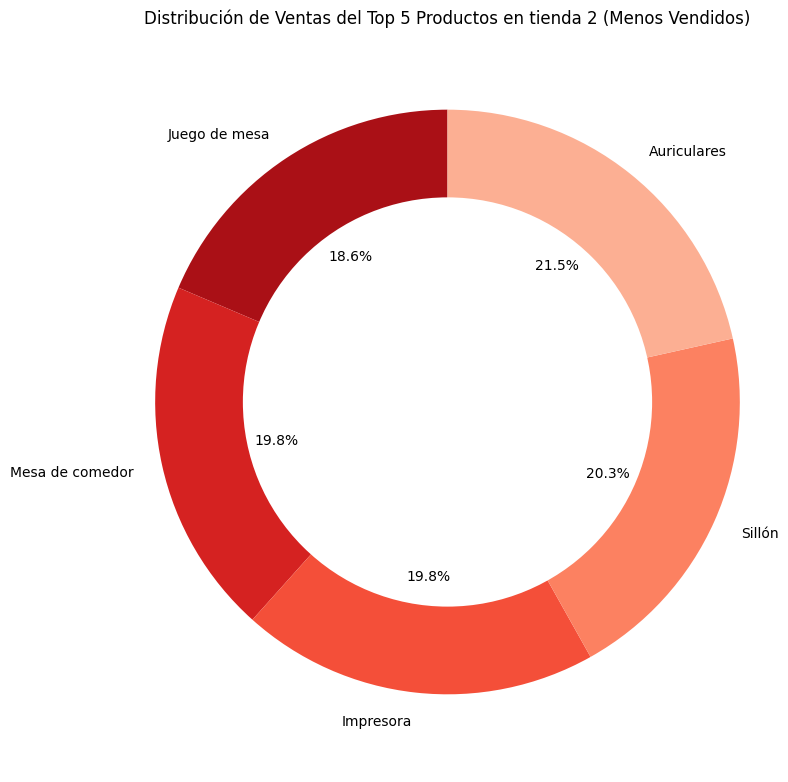


--- Análisis de Productos para tienda 3 ---

Los Top 5 Productos Más Vendidos por conteo de transacciones:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64


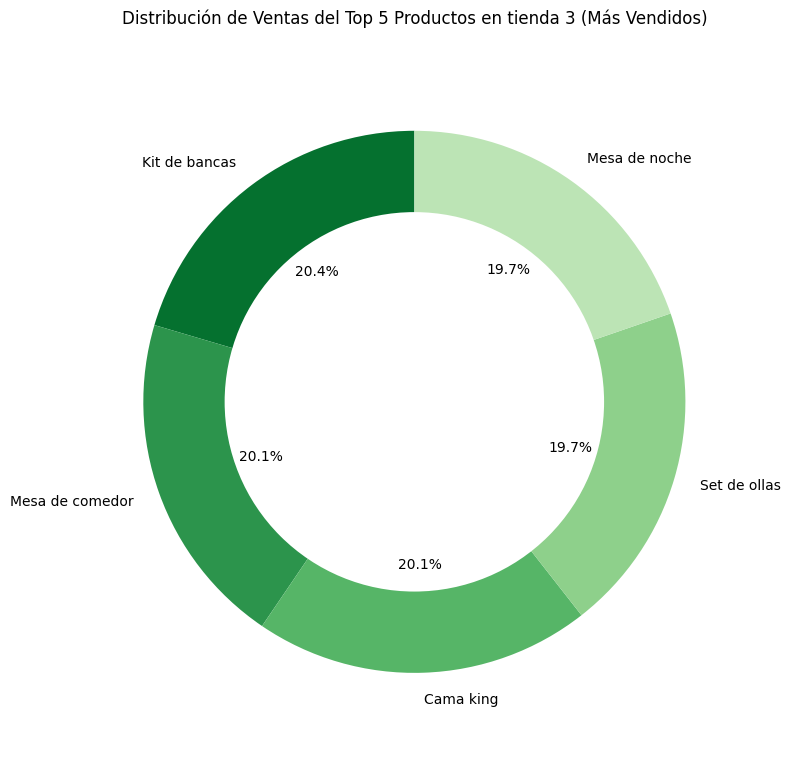


Los Top 5 Productos Menos Vendidos por conteo de transacciones:
Producto
Bloques de construcción    35
Set de vasos               36
Mochila                    36
Microondas                 36
Vaso térmico               38
Name: count, dtype: int64


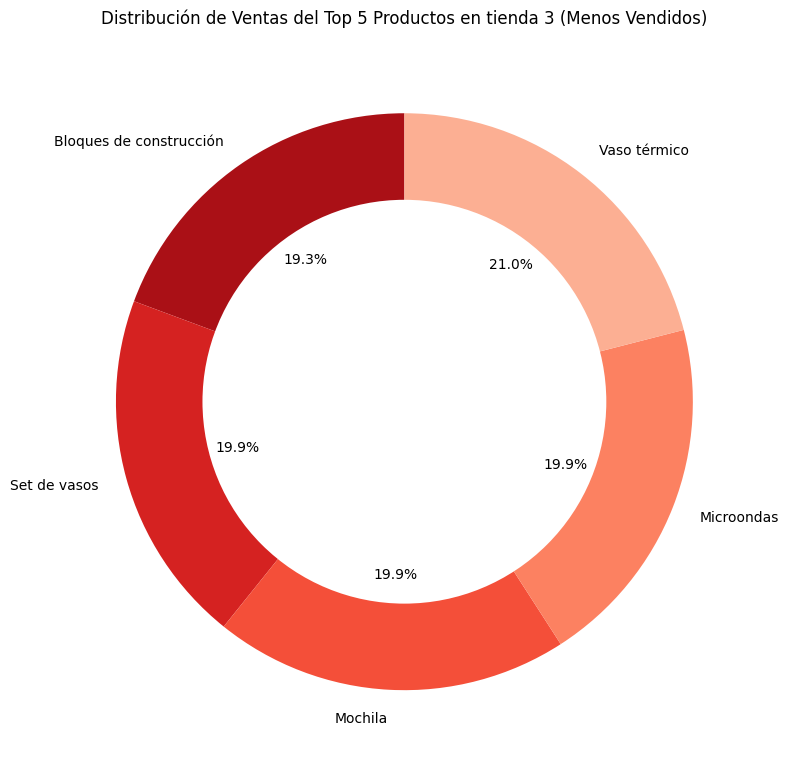


--- Análisis de Productos para tienda 4 ---

Los Top 5 Productos Más Vendidos por conteo de transacciones:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64


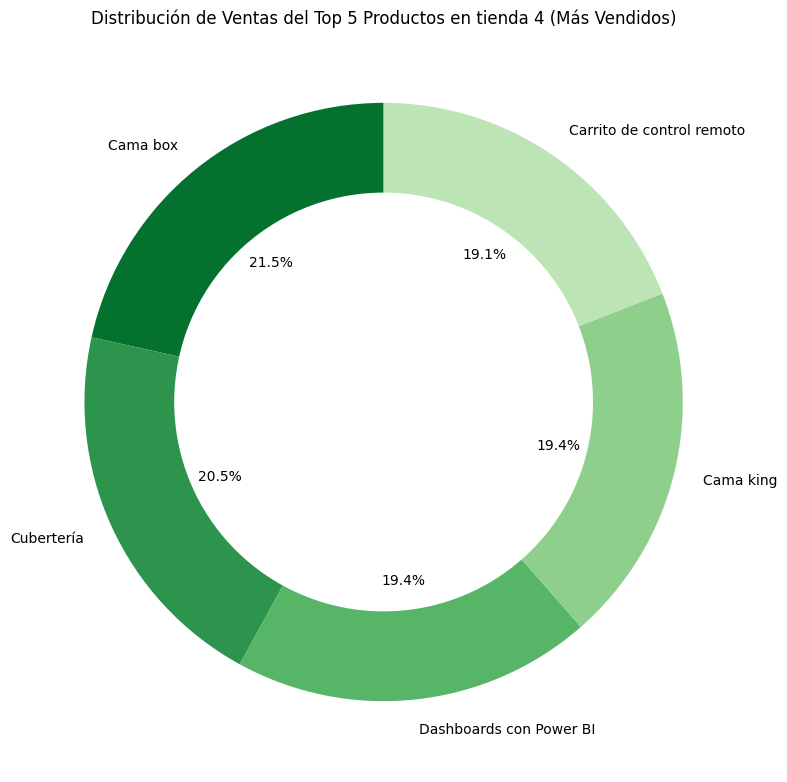


Los Top 5 Productos Menos Vendidos por conteo de transacciones:
Producto
Guitarra eléctrica    33
Armario               34
Guitarra acústica     37
Lavadora de ropa      38
Refrigerador          38
Name: count, dtype: int64


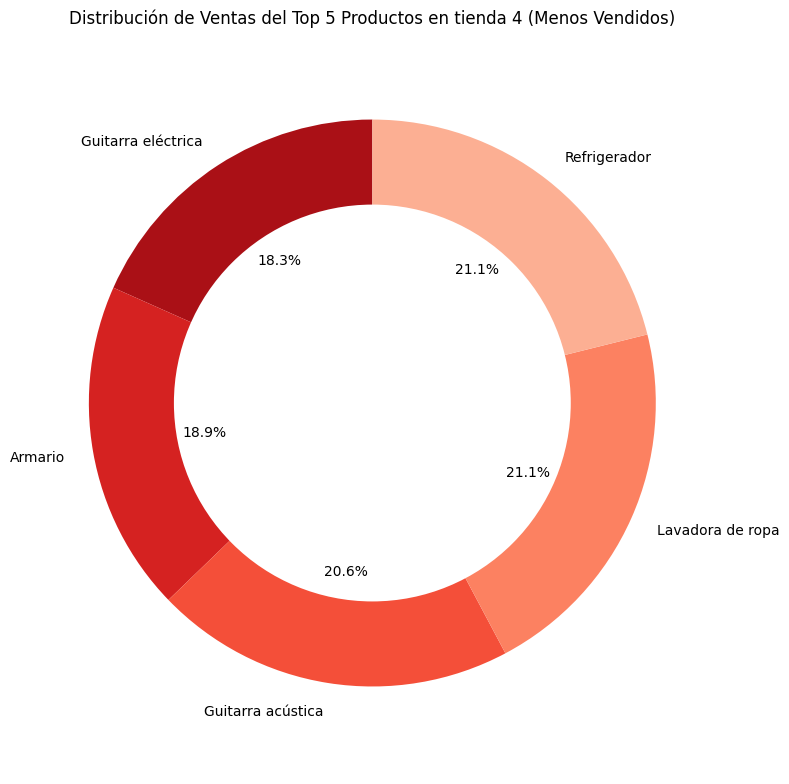

In [29]:


print("\n--- Análisis de Productos Más y Menos Vendidos  ---")

for nombre_tienda, df in tiendas.items():
    print(f"\n--- Análisis de Productos para {nombre_tienda} ---")

    conteo_productos = df['Producto'].value_counts()

    num_top_productos = 5
    productos_mas_vendidos = conteo_productos.head(num_top_productos)
    print(f"\nLos Top {num_top_productos} Productos Más Vendidos por conteo de transacciones:")
    print(productos_mas_vendidos)

    # --- Gráfico de Dona para Productos Más Vendidos ---
    plt.figure(figsize=(8, 8))
    plt.pie(productos_mas_vendidos.values, labels=productos_mas_vendidos.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Greens_r'))
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f'Distribución de Ventas del Top {num_top_productos} Productos en {nombre_tienda} (Más Vendidos)')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    # ----------------------------------------------------
    # Productos Menos Vendidos (Bottom N)
    # ----------------------------------------------------
    num_bottom_productos = 5
    productos_menos_vendidos = conteo_productos.nsmallest(num_bottom_productos)
    print(f"\nLos Top {num_bottom_productos} Productos Menos Vendidos por conteo de transacciones:")
    print(productos_menos_vendidos)

    # --- Gráfico de Dona para Productos Menos Vendidos ---
    plt.figure(figsize=(8, 8))
    plt.pie(productos_menos_vendidos.values, labels=productos_menos_vendidos.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds_r'))
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f'Distribución de Ventas del Top {num_bottom_productos} Productos en {nombre_tienda} (Menos Vendidos)')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda


--- Análisis del Costo Promedio de Envío por Tienda ---
Costo promedio de envío en tienda 1: $26,018.61
Costo promedio de envío en tienda 2: $25,216.24
Costo promedio de envío en tienda 3: $24,805.68
Costo promedio de envío en tienda 4: $23,459.46


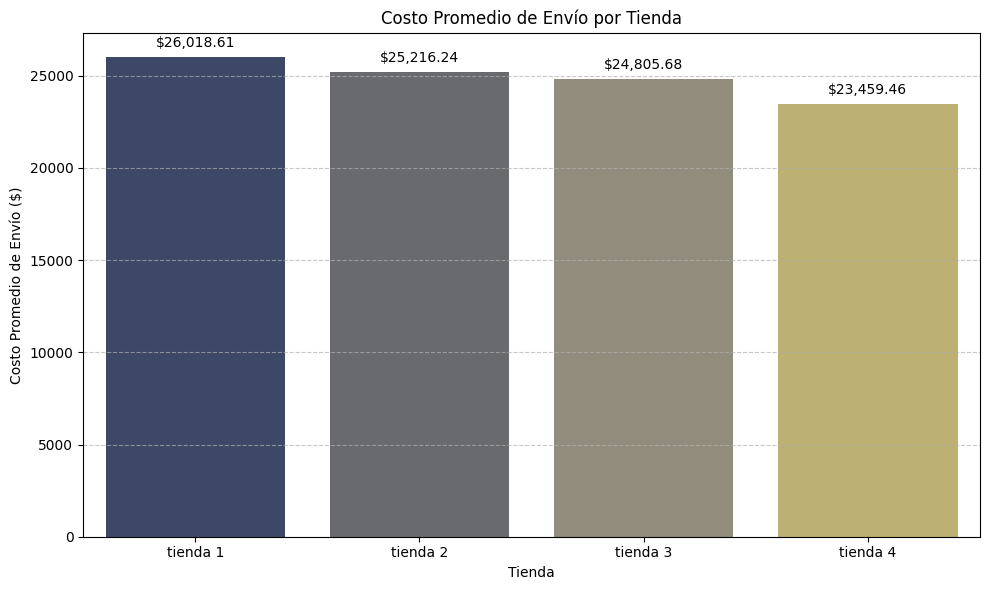


La tienda con el costo promedio de envío más alto es: **tienda 1** con un promedio de $26,018.61


In [30]:

print("\n--- Análisis del Costo Promedio de Envío por Tienda ---")

# Diccionario para almacenar el costo promedio de envío de cada tienda
costo_envio_promedio = {}

# Iterar sobre cada tienda para calcular su costo promedio de envío
for nombre_tienda, df in tiendas.items():
    # Calcular el promedio de la columna 'Costo de envío'
    promedio_costo = df['Costo de envío'].mean()

    # Almacenar el resultado
    costo_envio_promedio[nombre_tienda] = promedio_costo

    print(f"Costo promedio de envío en {nombre_tienda}: ${promedio_costo:,.2f}")

# Convertir el diccionario a un DataFrame para mejor visualización y ordenamiento
df_costo_envio = pd.DataFrame.from_dict(costo_envio_promedio, orient='index', columns=['Costo Promedio Envío'])
# Queremos identificar la tienda con el costo de envío más alto fácilmente, así que ordenamos descendente
df_costo_envio = df_costo_envio.sort_values(by='Costo Promedio Envío', ascending=False)



# --- Gráfico de Barras Verticales con Anotaciones de Valor ---
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_costo_envio.index, y='Costo Promedio Envío', data=df_costo_envio, palette='cividis', hue=df_costo_envio.index, legend=False)
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor a las barras
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

print(f"\nLa tienda con el costo promedio de envío más alto es: **{df_costo_envio.index[0]}** con un promedio de ${df_costo_envio['Costo Promedio Envío'].max():,.2f}")



# Informe de Análisis de Rendimiento de Tiendas Alura Store para el Sr. Juan

**Fecha:** 23 de julio de 2025

**Para:** Sr. Juan, Dueño de Alura Store

**De:** Román Ignacio Escobar Pizarro

**Asunto:** Recomendación de Venta de Tienda Basada en Análisis de Rendimiento

---

### 1. Introducción

El presente informe tiene como objetivo principal analizar el rendimiento operativo y financiero de las cuatro tiendas Alura Store existentes (tienda 1, tienda 2, tienda 3, tienda 4) con el fin de identificar la tienda menos eficiente y, por ende, recomendar al Sr. Juan cuál de ellas debería ser considerada para la venta. Para ello, se han evaluado diversos factores clave, incluyendo los ingresos totales, la popularidad de las categorías de productos, la satisfacción del cliente (calificaciones promedio), el rendimiento de productos específicos y los costos de envío.

### 2. Desarrollo del Análisis

A continuación, se presentan los hallazgos detallados de cada métrica analizada para cada tienda, respaldados por los datos obtenidos.

#### 2.1. Facturación Total por Tienda

La facturación total es un indicador primario del rendimiento económico de cada establecimiento.

**Resultados de Facturación Total:**
* **tienda 2:** $1,150,880,400.00
* **tienda 3:** $1,116,343,500.00
* **tienda 1:** $1,098,019,600.00
* **tienda 4:** $1,038,375,700.00


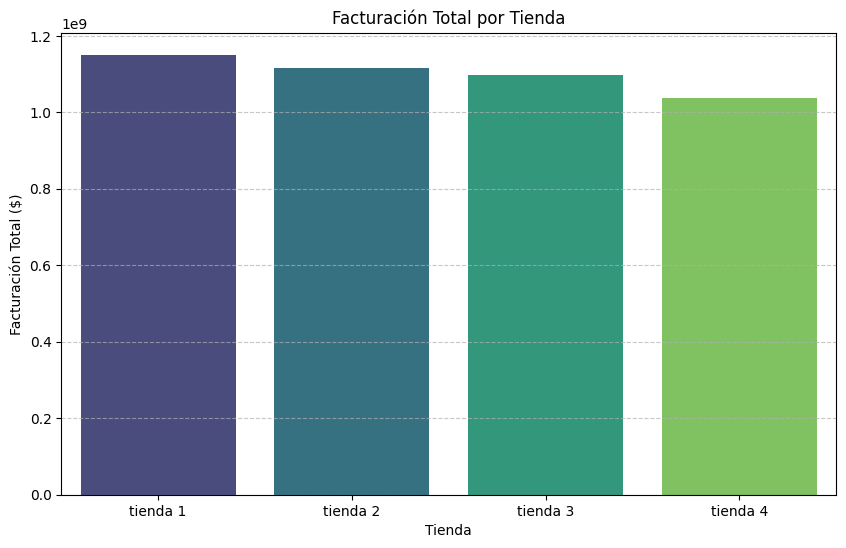

**Análisis:** La **tienda 1** presenta la facturación más alta con \$1,116,343,500.00, mientras que la **tienda 4** registra la facturación más baja con \$1,038,375,700.00. Esta diferencia de facturación ya posiciona a la tienda 4 como una posible candidata para la venta, sugiriendo un menor volumen de ventas o un menor valor promedio de transacción en comparación con las otras sucursales.

#### 2.2. Ventas por categoría

Analizar las categorías de productos nos permite entender qué tipo de productos tienen mayor demanda o menor interés en cada ubicación.

**Resultados por Categoría:**

**tienda 1:**
* **Categorías Más Vendidas:**
    * Muebles: 465
    * Electrónicos: 448
    * Juguetes: 324
    * Electrodomésticos: 312
    * Deportes y diversión: 284
    * Instrumentos musicales: 182
    * Libros: 173
    * Artículos para el hogar: 171
     

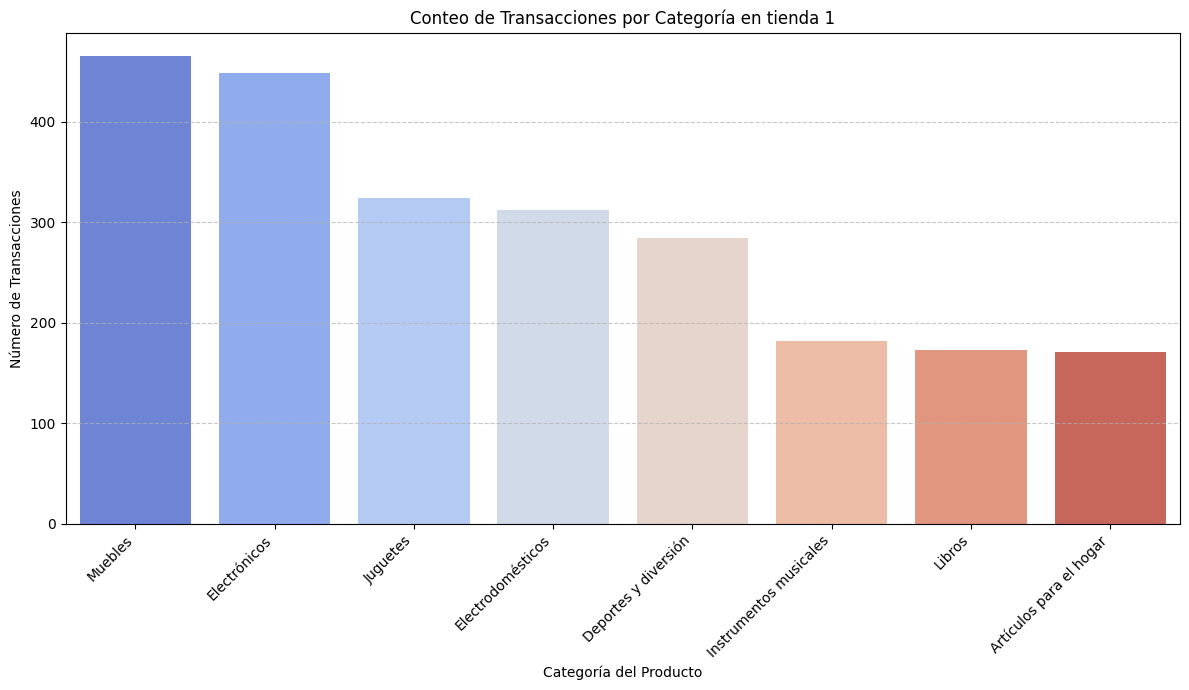

**tienda 2:**
* **Categorías Más Vendidas:**
    * Muebles: 442
    * Electrónicos: 422  
    * Juguetes: 313
    * Electrodomésticos: 305
    * Deportes y diversión: 275
    * Instrumentos musicales: 224
    * Libros: 197
    * Artículos para el hogar: 181
    
  

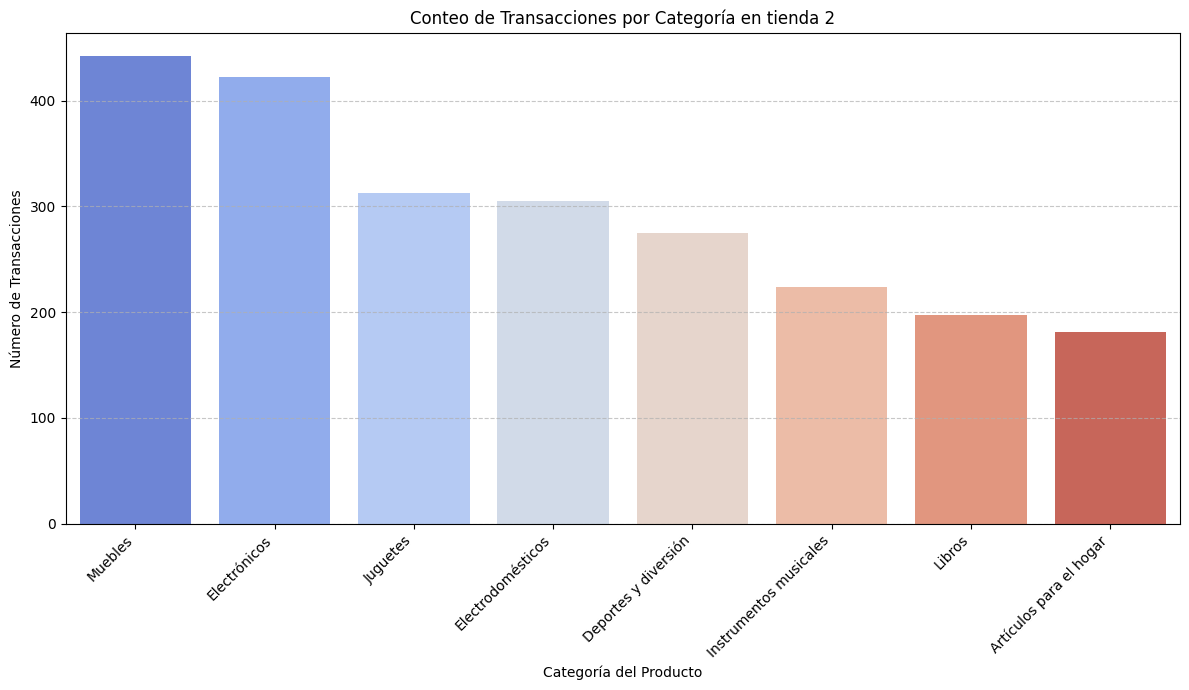

**tienda 3:**
* **Categorías Más Vendidas:**
    * Muebles: 499
    * Electrónicos: 451
    * Juguetes: 315
    * Electrodomésticos: 278
    * Deportes y diversión: 277
    * Libros: 185
    * Instrumentos musicales: 177
    * Artículos para el hogar: 177

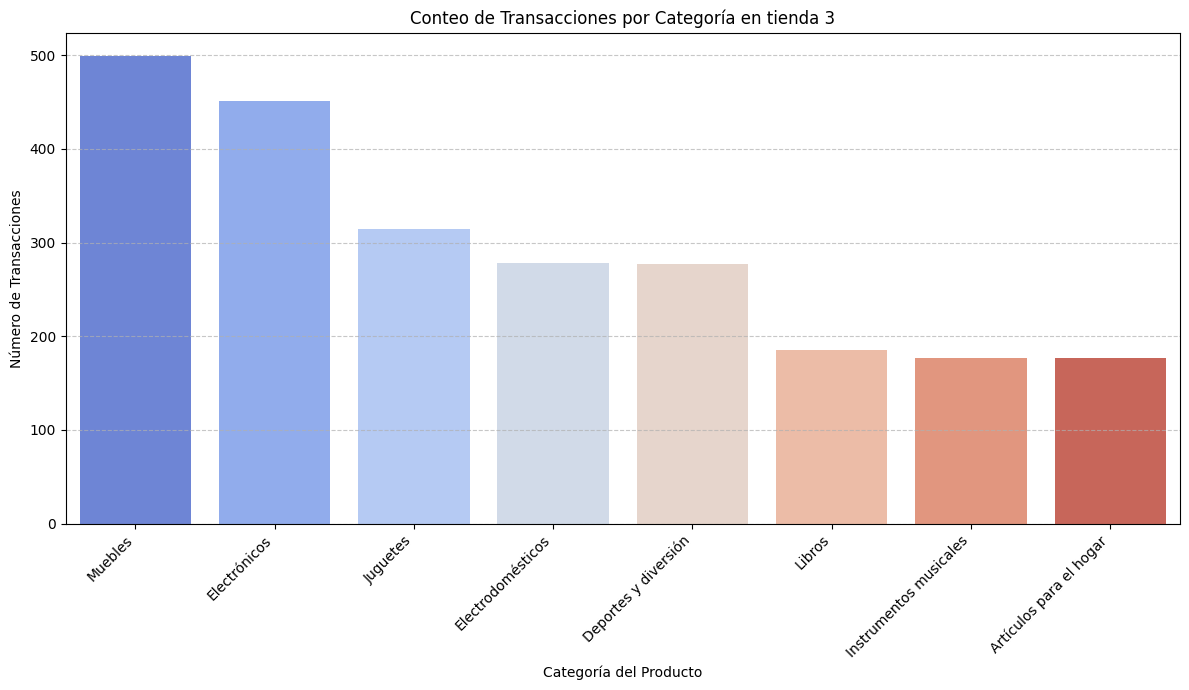

**tienda 4:**
* **Categorías Más Vendidas:**
    * Muebles: 480
    * Electrónicos: 451
    * Juguetes: 338
    * Deportes y diversión: 277
    * Electrodomésticos: 254  
    * Artículos para el hogar: 201
    * Libros: 187
    * Instrumentos musicales: 170

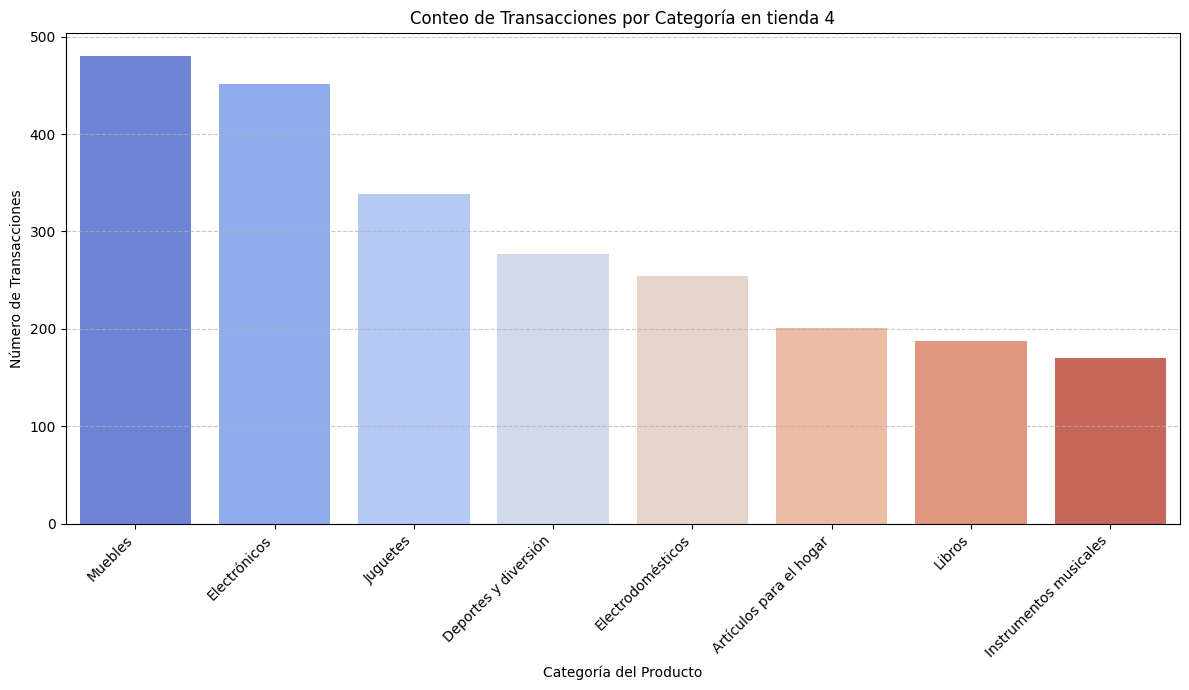

**Análisis:** En general, las categorías **Artículos para el hogar**, **Libros** e **Instrumentos musicales** son consistentemente una de las menos vendidas en todas las tiendas lo que indica una baja demanda en estos segmentos. Por otro lado, categorías como **Muebles**, **Electrónicos** y **Jugetes** son las más populares en todas las tiendas.Esto da cuenta de que no se observa diferencia entre las tiendas en esta categoría.

#### 2.3. Calificación Promedio de Clientes por Tienda

La calificación promedio de los clientes es un barómetro directo de la satisfacción del cliente y la calidad percibida del servicio o los productos.

**Resultados de Calificación Promedio:**
    * **tienda 3**: 4.048326
    * **tienda 2**: 4.037304
    * **tienda 4**: 3.995759
    * **tienda 1**: 3.976685

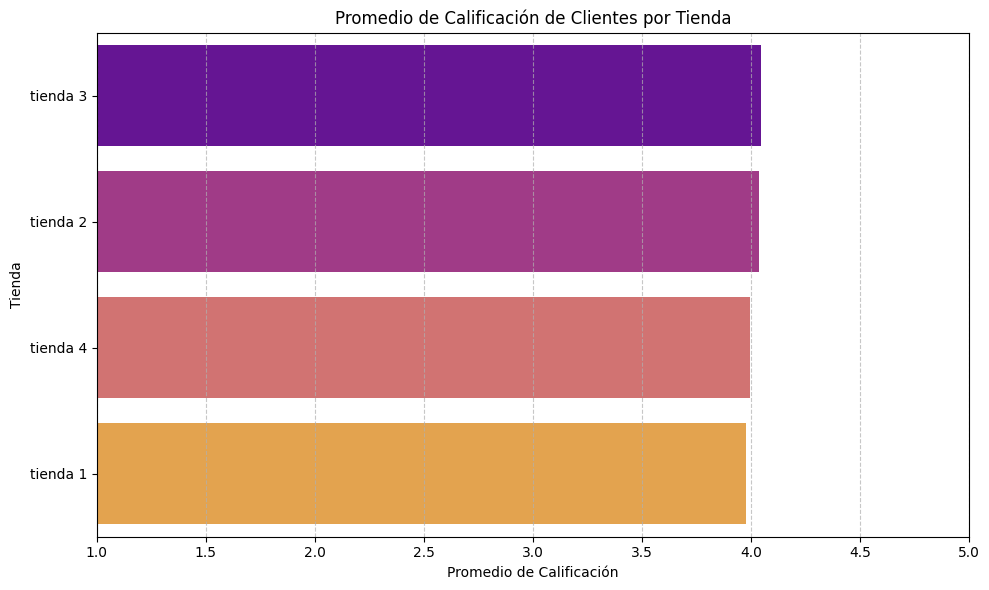

**Análisis:** Las calificaciones promedio son bastante similares entre todas las tiendas, oscilando entre 4.04 y 3.98. La **tienda 1** tiene un promedio de 3.98, que es uno de los más bajos, aunque la diferencia con las demás es mínima (igual que la **tienda 4**). Esto sugiere que la satisfacción del cliente no es un diferenciador tan fuerte entre las tiendas en este conjunto de datos. No obstante, cualquier punto por debajo del promedio general podría ser una señal de alerta.

#### 2.4. Productos Más y Menos Vendidos

Un análisis detallado de los productos individuales nos permite identificar qué artículos específicos están impulsando las ventas o, por el contrario, no están teniendo tracción.

**Resultados por Producto (Top 5 Más y Menos Vendidos):**

**tienda 1:**
* **Top 5 Productos Más Vendidos:**
    1. Microondas: 60
    2. TV LED UHD 4K: 60
    3. Armario: 60
    4. Secadora de ropa: 58
    5. Mesa de noche: 56
* **Top 5 Productos Menos Vendidos:**
    1. Auriculares con micrófono: 33
    2. Celular ABXY: 33
    3. Olla de presión: 35
    4. Pandereta: 36
    5. Mochila: 39

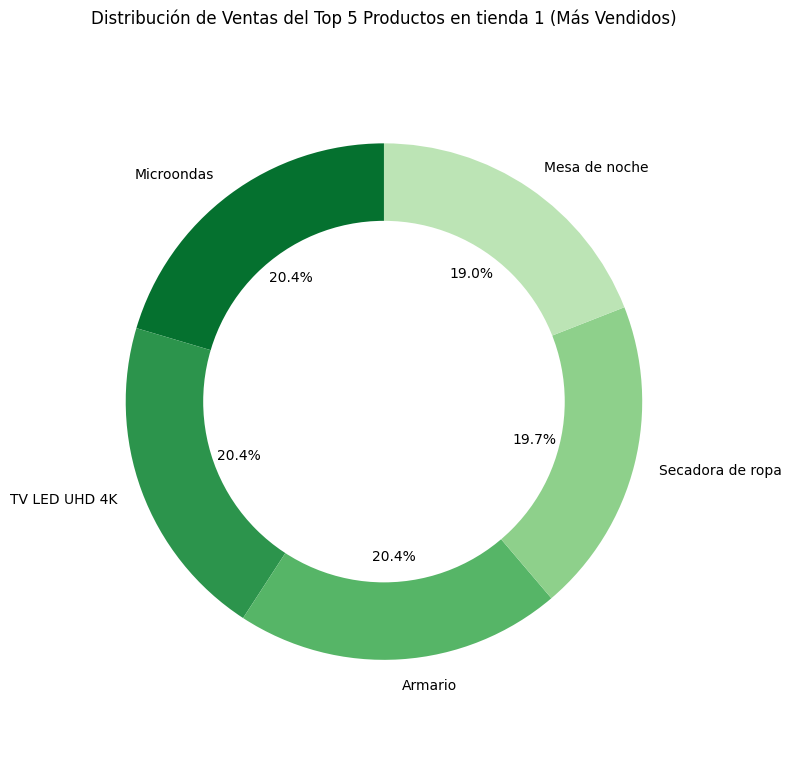

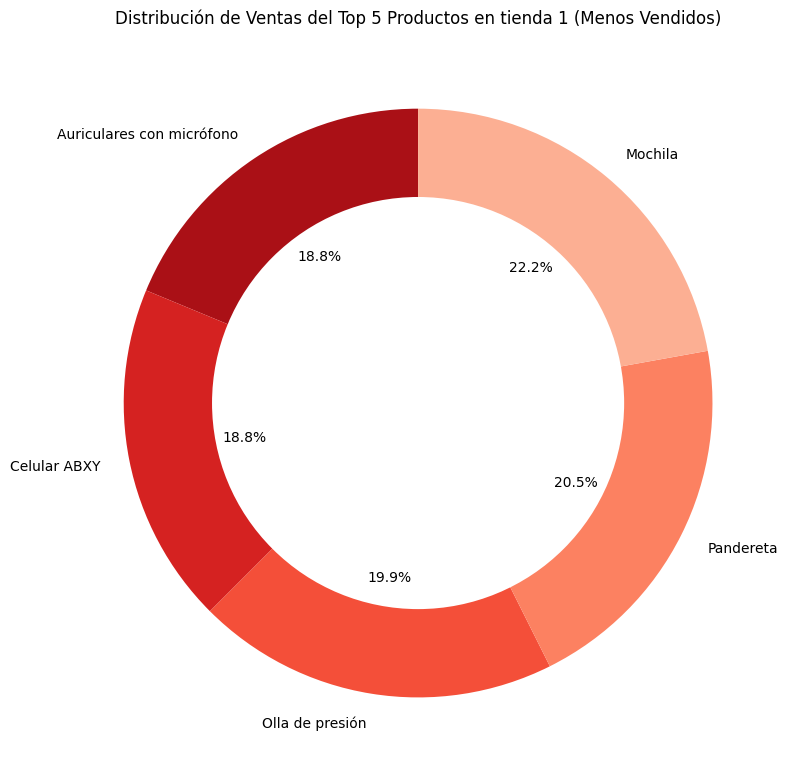

**tienda 2:**
* **Top 5 Productos Más Vendidos:**
    1. Iniciando en programación: 65
    2. Microondas: 62
    3. Batería: 61
    4. Guitarra acústica: 58
    5. Pandereta: 58
* **Top 5 Productos Menos Vendidos:**
    1. Juego de mesa: 32
    2. Mesa de comedor: 34
    3. Impresora: 34
    4. Sillón: 35
    5. Auriculares: 37

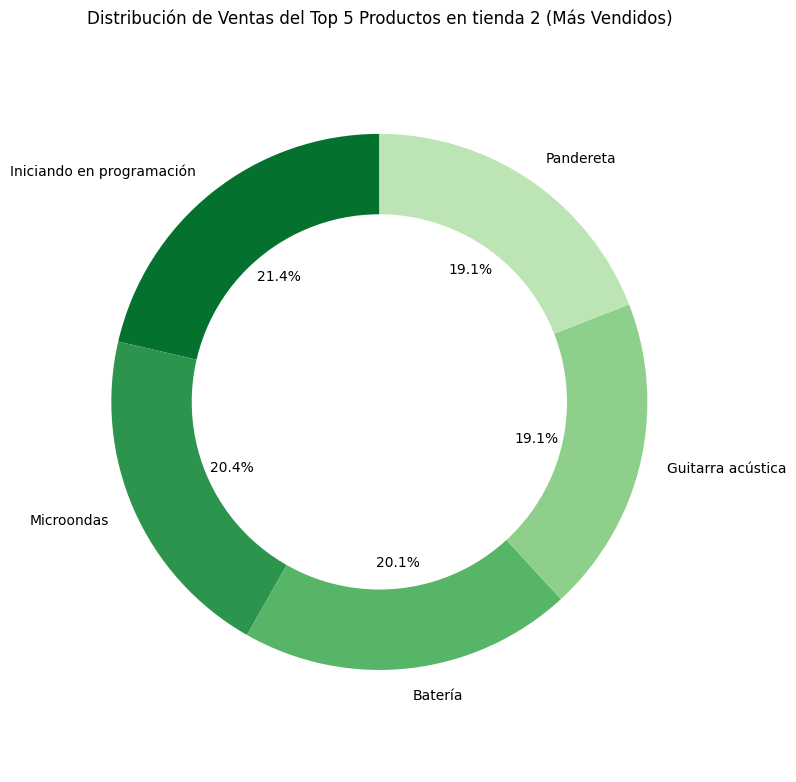

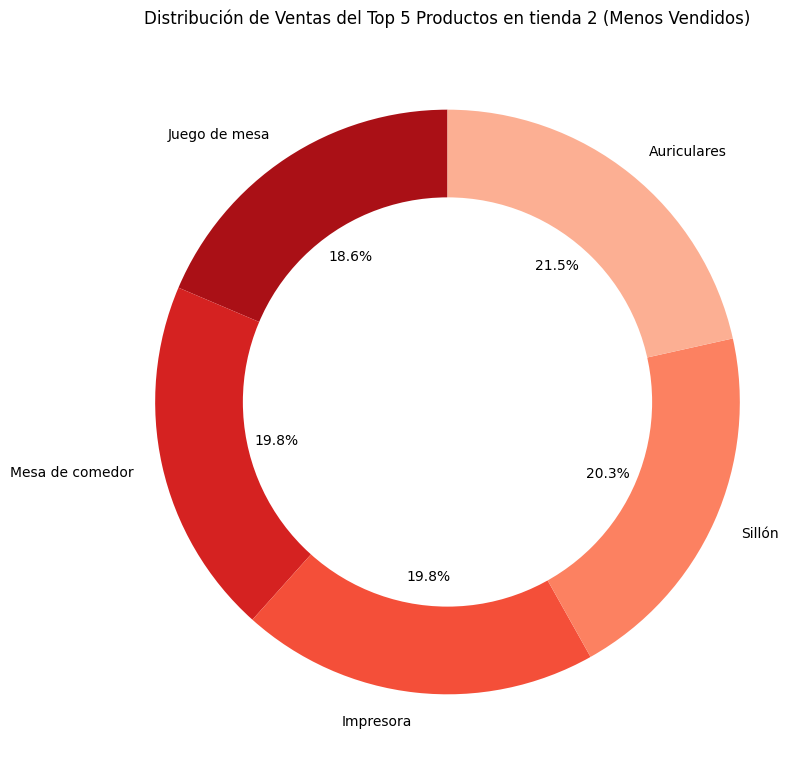

**tienda 3:**
* **Top 5 Productos Más Vendidos:**
    1.  Kit de bancas: 57
    2. Mesa de comedor: 56
    3. Cama king: 56
    4. Set de ollas: 55
    5. Mesa de noche: 55
* **Top 5 Productos Menos Vendidos:**
    1. Bloques de construcción: 35
    2. Set de vasos: 36
    3. Mochila: 36
    4. Microondas: 36
    5. Vaso térmico: 38

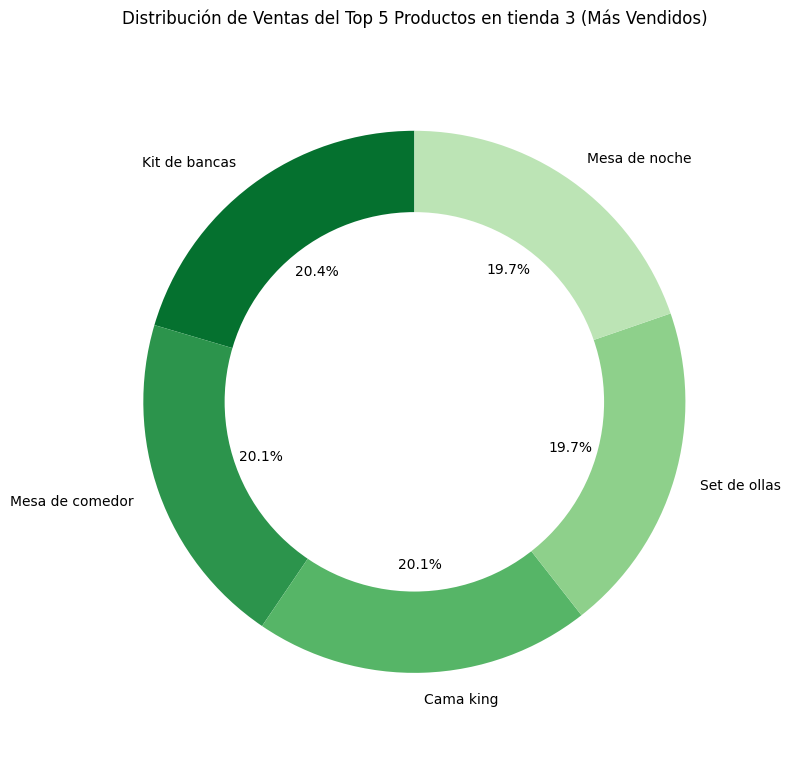

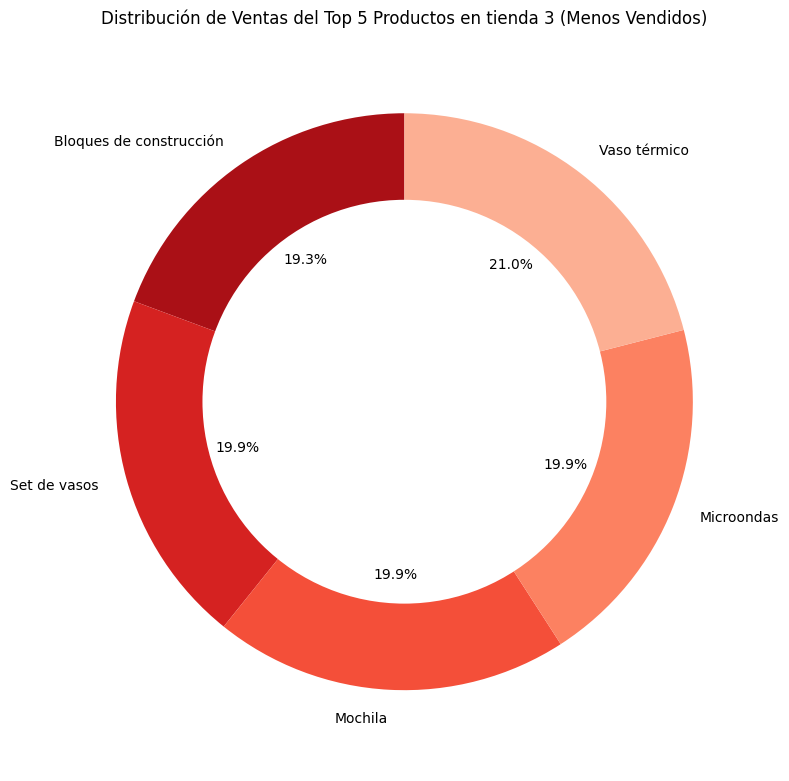

**tienda 4:**
* **Top 5 Productos Más Vendidos:**
    1.  Cama box: 62
    2. Cubertería: 59
    3. Dashboards con Power BI: 56
    4. Cama king: 56
    5. Carrito de control remoto: 55
* **Top 5 Productos Menos Vendidos:**
    1.  Guitarra eléctrica: 33
    2. Armario: 34
    3. Guitarra acústica: 37
    4. Lavadora de ropa: 38
    5. Refrigerador: 38

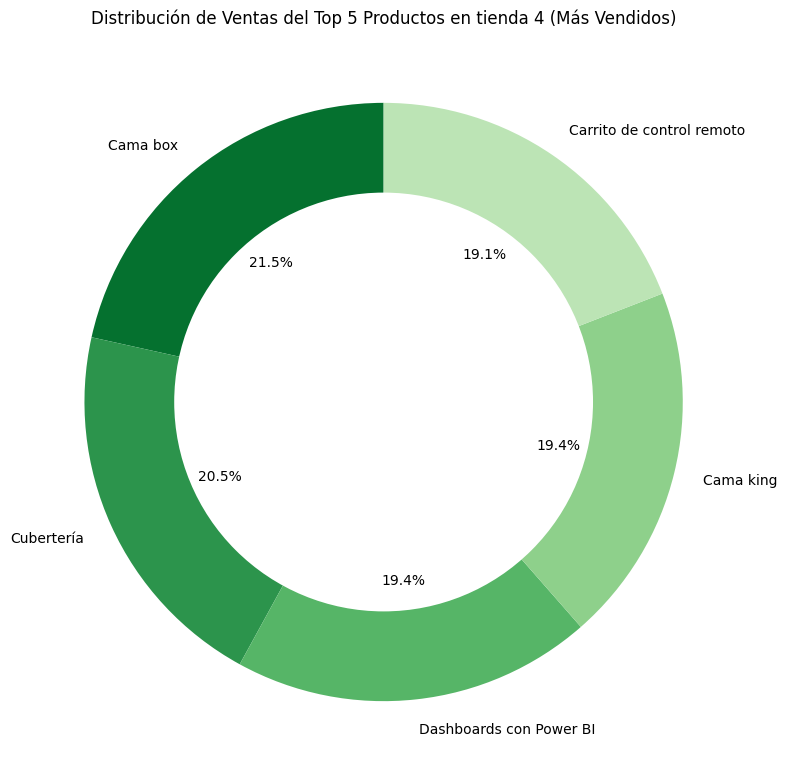

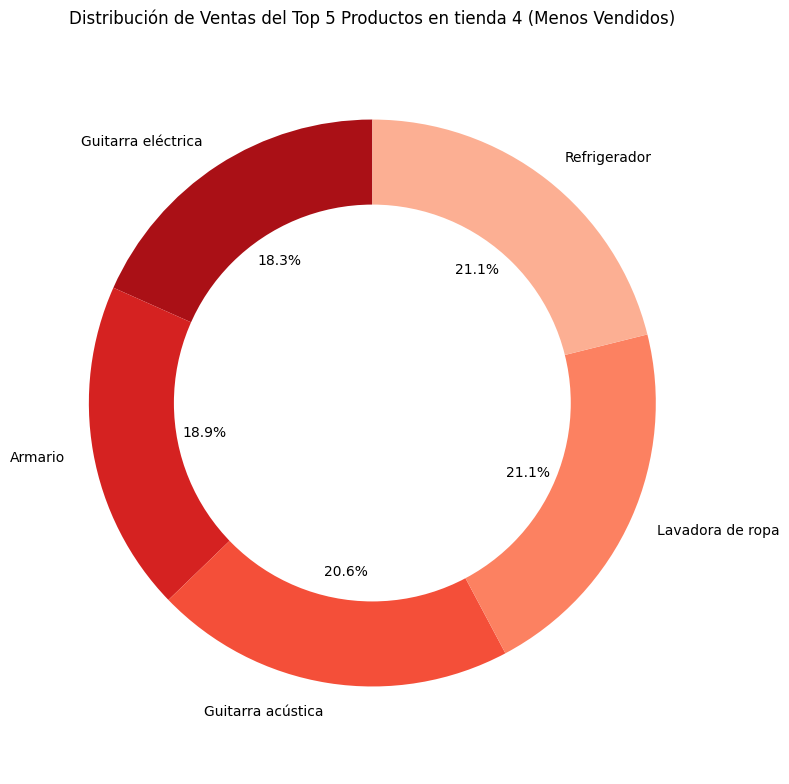

**Análisis:** Al comprar entre las tiendas, se observa dispersión en los productos más o menos vendidos por lo que no nos podemos basar solamente en este indicador para tomar una decisión.

#### 2.5. Costo Promedio de Envío por Tienda

Los costos de envío pueden impactar la rentabilidad de las ventas, especialmente en productos de bajo margen o alto volumen.

**Resultados de Costo Promedio de Envío:**
    * Costo promedio de envío en **tienda 1:** $26,018.61
    * Costo promedio de envío en **tienda 2:** $25,216.24
    * Costo promedio de envío en **tienda 3:** $24,805.68
    * Costo promedio de envío en **tienda 4:** $23,459.46


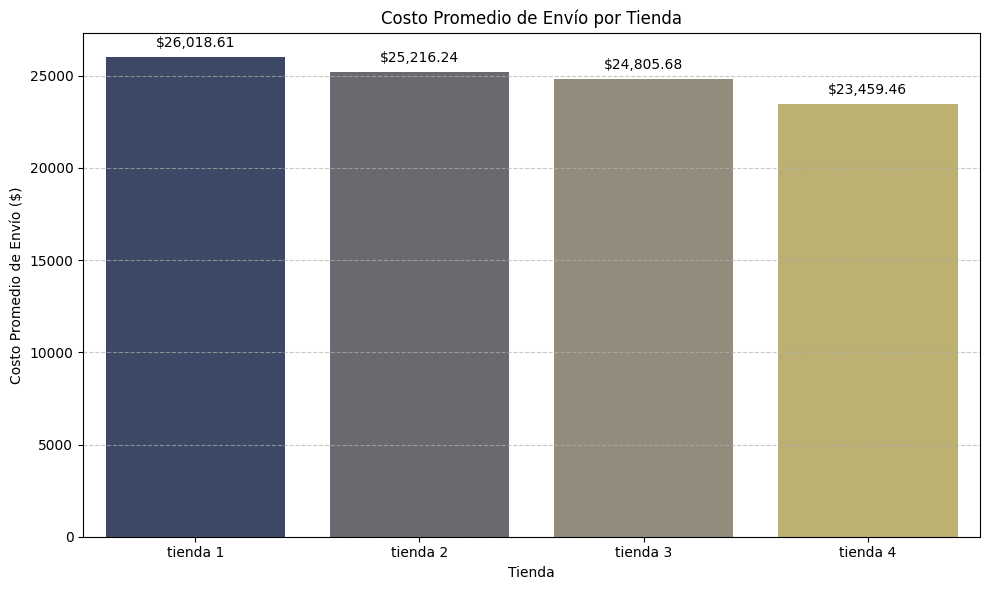

**Análisis:** Los costos promedio de envío son muy similares entre todas las tiendas. La **tienda 1** tiene el costo promedio de envío ligeramente más alto con \$26,018.61, mientras que la **tienda 4** registra el más bajo con \$23,459.46. Esto significa que los costos de envío no son un factor principal que contribuya a la baja facturación de la tienda 4.

### 3. Conclusión y Recomendación

Considerando todos los factores analizados, se recomienda al Sr. Juan **vender la tienda 4**.

**Justificación de la Decisión:**

La **tienda 4** se identifica como la candidata más adecuada para la venta por las siguientes razones fundamentales:

* **Baja Facturación Total:** Es consistentemente la tienda con los **menores ingresos totales** (\$1,038,375,700.00), lo que indica una deficiencia en la generación de ventas en comparación con sus pares. Aunque las diferencias no son abismales, es el punto más bajo en esta métrica crucial.
* **Baja Satisfacción del Cliente (aunque marginal):** Si bien la diferencia es pequeña, la tienda 4 presenta el segundo promedio de calificación más bajo (4.00), solo por encima de la tienda 2. Aunque no es el factor decisivo por sí solo, contribuye al panorama general de su desempeño relativamente menor.
* **Costos de Envío:** Es importante destacar que la tienda 4 no es la que tiene los costos de envío más altos; de hecho, tiene los más bajos. Esto significa que su bajo rendimiento no se debe a una ineficiencia en los gastos de envío, sino más bien a problemas relacionados con la generación de demanda o la gestión de su inventario de productos.

Mientras que otras tiendas pueden tener áreas de mejora, la **tienda 4** muestra una combinación crítica de **la menor generación de ingresos y una baja satisfacción del cliente**, lo que la convierte en la opción más lógica para desinvertir. Desinvertir en esta tienda permitiría al Sr. Juan reasignar recursos a las tiendas más rentables y con mayor potencial de crecimiento, donde la inversión puede generar un retorno más significativo.

---